<a href="https://colab.research.google.com/github/VictorMarques94/IntCD/blob/master/ProjetoCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto: Eleições 2018, análise do resultado das eleições para Governador de Pernambuco, por município e Região de Desenvolvimento.**


Em meio a polarização política no Brasil, nunca se discutiu tanto o uso dos dados, das mais variadas fontes, em campanhas eleitorais.
Nesse contexto, considero importante, a análise de dados de eleições passadas com o objetivo de indentificar correlações e possíveis padrões. 

# Aluno: Victor Marques Alves
Disciplina: Introdução à Análise de Dados

Professsor: Luciano Barbosa

Fonte: Banco pessoal. Informações retiradas do repositório do TRE

# Carregando a Base de Dados

In [0]:
#Importando as Bibliotecas
import pandas as pd
import numpy as np


In [0]:
#Importando a nossa base de trabalho
base=pd.read_csv("https://raw.githubusercontent.com/VictorMarques94/IntCD/master/1%20PERNAMBUCO.csv",encoding = "ISO-8859-1")

In [139]:
#Detalhe da Base
base.shape

(185, 1)

In [0]:
#Separando as Colunas por Ponto e Virgula
base=pd.read_csv("https://raw.githubusercontent.com/VictorMarques94/IntCD/master/1%20PERNAMBUCO.csv",encoding = "ISO-8859-1",sep=";")

In [141]:
#Detalhe da base após alteração
base.shape

(185, 7)

In [142]:
#Informações da Base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
RD               185 non-null object
MUNICIPIO        185 non-null object
ELEITORES        185 non-null int64
Votos validos    185 non-null int64
PC               185 non-null int64
AM               185 non-null int64
OUTROS           185 non-null int64
dtypes: int64(5), object(2)
memory usage: 10.2+ KB


In [143]:
#Visual das primeiras linhas
base.head()

,RD,MUNICIPIO,ELEITORES,Votos validos,PC,AM,OUTROS
0,AGRESTE CENTRAL,AGRESTINA,18041,10355,3896,5858,601
1,AGRESTE CENTRAL,ALAGOINHA,12129,6298,4421,1428,449
2,AGRESTE CENTRAL,ALTINHO,16016,8155,4610,3097,448
3,AGRESTE CENTRAL,BARRA DE GUABIRABA,8950,5870,3932,1670,268
4,AGRESTE CENTRAL,BELO JARDIM,60167,26954,8584,15993,2377


In [144]:
#Visual das Últimas Linhas
base.tail()

,RD,MUNICIPIO,ELEITORES,Votos validos,PC,AM,OUTROS
180,SERTÌO DO SÌO FRANCISCO,DORMENTES,15509,8722,4013,3349,1360
181,SERTÌO DO SÌO FRANCISCO,LAGOA GRANDE,19174,11041,7505,2261,1275
182,SERTÌO DO SÌO FRANCISCO,OROCî,11903,6829,3800,2141,888
183,SERTÌO DO SÌO FRANCISCO,PETROLINA,198599,117693,48707,38403,30583
184,SERTÌO DO SÌO FRANCISCO,SANTA MARIA DA BOA VISTA,29051,17184,6592,8392,2200


In [145]:
#Verificando os Tipos de Dados 
base.dtypes

RD               object
MUNICIPIO        object
ELEITORES         int64
Votos validos     int64
PC                int64
AM                int64
OUTROS            int64
dtype: object

In [146]:
#Alterando os tipos de Dados
base.RD = base.RD.astype('category')
base.MUNICIPIO = base.MUNICIPIO.astype('category')


base.dtypes

RD               category
MUNICIPIO        category
ELEITORES           int64
Votos validos       int64
PC                  int64
AM                  int64
OUTROS              int64
dtype: object

#LIMPEZA DA BASE

Verificação de linhas repetidas

In [147]:
base[base.duplicated(keep=False)]


,RD,MUNICIPIO,ELEITORES,Votos validos,PC,AM,OUTROS


*Não há linhas repetidas na base*


Verificando se existem dados ausentes

In [148]:
base.isna().sum()


RD               0
MUNICIPIO        0
ELEITORES        0
Votos validos    0
PC               0
AM               0
OUTROS           0
dtype: int64

*Não há dados ausentes*

O comparativo será realizado, considerando apenas as candidaturas de Paulo Câmara (PC) e Armando Monteiro (AM). Portanto, iremos remover as colunas referentes a Outros candidatos


In [149]:
base.drop('OUTROS', axis=1, inplace=True)
base.head()


,RD,MUNICIPIO,ELEITORES,Votos validos,PC,AM
0,AGRESTE CENTRAL,AGRESTINA,18041,10355,3896,5858
1,AGRESTE CENTRAL,ALAGOINHA,12129,6298,4421,1428
2,AGRESTE CENTRAL,ALTINHO,16016,8155,4610,3097
3,AGRESTE CENTRAL,BARRA DE GUABIRABA,8950,5870,3932,1670
4,AGRESTE CENTRAL,BELO JARDIM,60167,26954,8584,15993


#Correlação

In [150]:
base.corr(method='spearman')

,ELEITORES,Votos validos,PC,AM
ELEITORES,1.000000,0.988076,0.911088,0.893724
Votos validos,0.988076,1.000000,0.927603,0.895025
PC,0.911088,0.927603,1.000000,0.699125
AM,0.893724,0.895025,0.699125,1.000000


#Normalizando

As colunas PC e AM, estão distribuidas da seguinte maneira

In [151]:
base['PC'].describe()


count       185.000000
mean      10368.751351
std       25527.057328
min         877.000000
25%        3587.000000
50%        5169.000000
75%        8584.000000
max      311792.000000
Name: PC, dtype: float64

In [152]:
base['AM'].describe()


count       185.000000
mean       7359.935135
std       19667.949410
min         328.000000
25%        2070.000000
50%        3314.000000
75%        5959.000000
max      239123.000000
Name: AM, dtype: float64

Normalizando por meio da técnica de padronização transformando os dados da colunas 'PC' e 'AM' e imputando os dados padronizados para duas novas colunas 'AM_1' e 'PC_1':



In [158]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
base['PC_1'] = scaler.fit_transform(base[['PC']])
base['PC_1'].describe()

count    185.000000
mean       0.030528
std        0.082103
min        0.000000
25%        0.008716
50%        0.013804
75%        0.024788
max        1.000000
Name: PC_1, dtype: float64

In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
base['AM_1'] = scaler.fit_transform(base[['AM']])
base['AM_1'].describe()

count    185.000000
mean       0.029448
std        0.082363
min        0.000000
25%        0.007295
50%        0.012504
75%        0.023581
max        1.000000
Name: AM_1, dtype: float64

#Discretizando

In [169]:
#Intervalos PC
base['PC_inter'] = pd.cut(base['PC'],20)
base['PC_inter'].value_counts()

(566.085, 16422.75]      167
(16422.75, 31968.5]       10
(31968.5, 47514.25]        2
(47514.25, 63060.0]        2
(94151.5, 109697.25]       1
(63060.0, 78605.75]        1
(78605.75, 94151.5]        1
(296246.25, 311792.0]      1
(171880.25, 187426.0]      0
(156334.5, 171880.25]      0
(280700.5, 296246.25]      0
(125243.0, 140788.75]      0
(109697.25, 125243.0]      0
(187426.0, 202971.75]      0
(202971.75, 218517.5]      0
(218517.5, 234063.25]      0
(234063.25, 249609.0]      0
(249609.0, 265154.75]      0
(265154.75, 280700.5]      0
(140788.75, 156334.5]      0
Name: PC_inter, dtype: int64

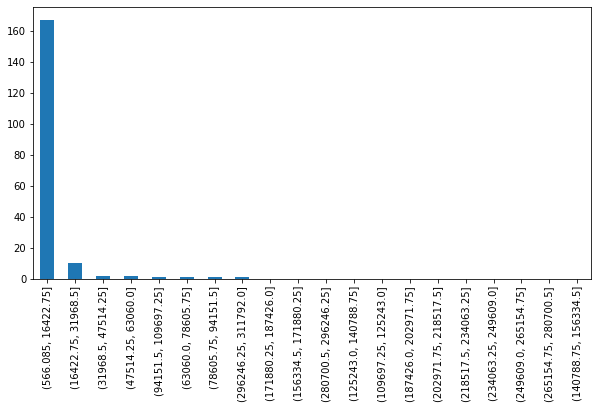

In [170]:
#Grafico dos intervalos iguais PC
counts = base['PC_inter'].value_counts()
counts.plot.bar(figsize=(10,5))

In [171]:
#Intervalos AM
base['AM_inter'] = pd.cut(base['AM'],20)
base['AM_inter'].value_counts()

(89.205, 12267.75]       166
(12267.75, 24207.5]       11
(24207.5, 36147.25]        2
(36147.25, 48087.0]        2
(48087.0, 60026.75]        2
(71966.5, 83906.25]        1
(227183.25, 239123.0]      1
(143605.0, 155544.75]      0
(131665.25, 143605.0]      0
(119725.5, 131665.25]      0
(215243.5, 227183.25]      0
(95846.0, 107785.75]       0
(83906.25, 95846.0]        0
(155544.75, 167484.5]      0
(60026.75, 71966.5]        0
(167484.5, 179424.25]      0
(179424.25, 191364.0]      0
(191364.0, 203303.75]      0
(203303.75, 215243.5]      0
(107785.75, 119725.5]      0
Name: AM_inter, dtype: int64

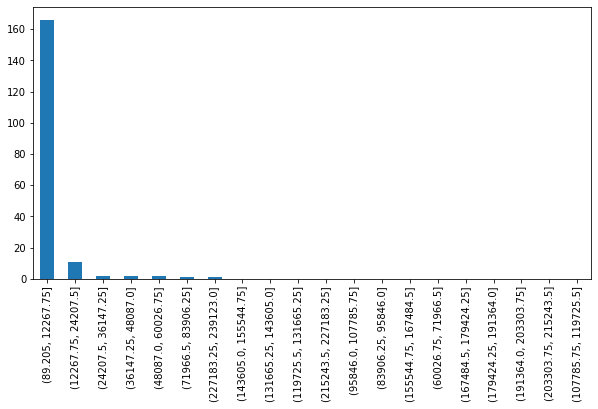

In [172]:
#Grafico dos intervalos iguais PC
counts = base['AM_inter'].value_counts()
counts.plot.bar(figsize=(10,5))

In [174]:
#descrevendo PC
base['PC'].describe()

count       185.000000
mean      10368.751351
std       25527.057328
min         877.000000
25%        3587.000000
50%        5169.000000
75%        8584.000000
max      311792.000000
Name: PC, dtype: float64

In [177]:
#Discretizando PC
base['PC_inter_1'] = pd.qcut(base['PC'],8)
base['PC_inter_1'].value_counts()

(876.999, 2796.0]      24
(13816.0, 311792.0]    23
(8584.0, 13816.0]      23
(6592.0, 8584.0]       23
(5169.0, 6592.0]       23
(4347.0, 5169.0]       23
(3587.0, 4347.0]       23
(2796.0, 3587.0]       23
Name: PC_inter_1, dtype: int64

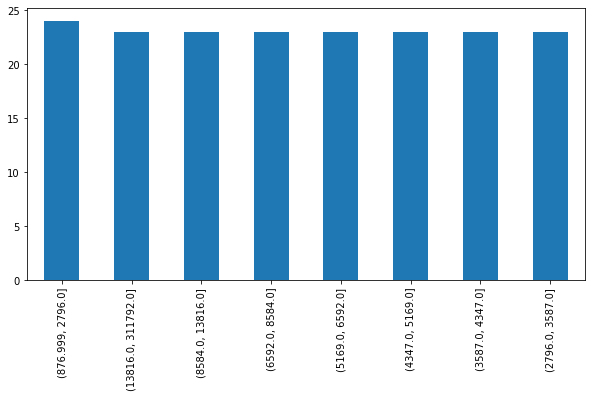

In [178]:
#Grafico de PC discretizado
counts = base['PC_inter_1'].value_counts()
counts.plot.bar(figsize=(10,5))

In [179]:
#descrevendo AM
base['AM'].describe()

count       185.000000
mean       7359.935135
std       19667.949410
min         328.000000
25%        2070.000000
50%        3314.000000
75%        5959.000000
max      239123.000000
Name: AM, dtype: float64

In [180]:
#Discretizando AM
base['AM_inter_1'] = pd.qcut(base['AM'],8)
base['AM_inter_1'].value_counts()

(327.999, 1362.0]     24
(9858.0, 239123.0]    23
(5959.0, 9858.0]      23
(4324.0, 5959.0]      23
(3314.0, 4324.0]      23
(2593.0, 3314.0]      23
(2070.0, 2593.0]      23
(1362.0, 2070.0]      23
Name: AM_inter_1, dtype: int64

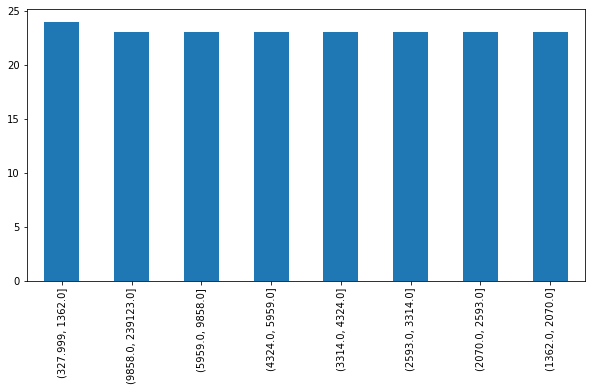

In [181]:
#Grafico de AM discretizado
counts = base['AM_inter_1'].value_counts()
counts.plot.bar(figsize=(10,5))